# Модель, обучаемая без использования градиентного спуска

Перспектрон Розенбалат - это простейшая математическая модель искусственного нейрона, которая при правильном использовании может разделять два линейно разделимых множества. 



Для начала рассмотрим как устроен искусственный математический нейрон.
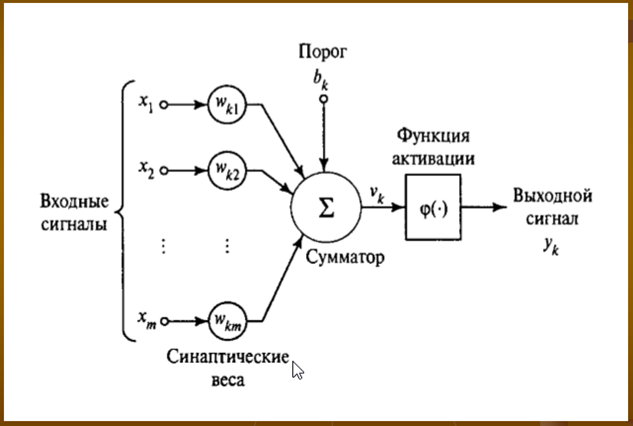

На самом деле, нейрон - это просто сумматор и функция, которая генерирует единственный выход - цифровое значение. 

$y_k = \phi(x_1*w_1+x_2*w_2+...+w_n*x_n+b_0) = \phi(\sum_{i=1}^{n}(w_i*x_i)+b_0)$, где

$w_i$ - это вес, с которым будет учитываться $i$-ый сигнал. \\
$x_i$ - входной сигнал. \\
$b_0$ - порог, сдвиг или смещение.

При этом для удобства использования математическо аппарата $b_0$ принято считать весом для некоего входного сигнала $x_0$, который всегда равен единице. Таким образом формулу можно упростить:

$y_k = \phi(\sum_{i=0}^{n}(w_i*x_i))$

Рассмотрим независимый пример.

$y = k*x+b$ - ничего не напоминает? 

Таким образом, простой математический нейрон является прямой в $n+1$-мерном пространстве. 

Известно, что модуль значения $res = sgn(w_1*x-w_2*y+b)$ позволяет определить к какой части полуплоскости отностся конкретная точка $(x, y)$.

Таким образом, простейший нейрон может использоваться для линейного разделения пространства, если в качестве функции $\phi$ использовать функцию $sgn$.

В этом случае может быть реализована простейшая процедура обучения, в которой подбор весовых коэффициентов осуществляется с учителем на основании сравнения исходных данных с результатом исследования и "подкручиванием" коэффициентов с определённым шагом. 

## Практика

### Генерация данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
 
 
class SemicircleGenerator(object):
 
    def __init__(self, StartLocation, RadiusList, Orientation):
        super(SemicircleGenerator, self).__init__()
        self.StartLocation = StartLocation
        self.MaxRadius = max(RadiusList)
        self.MinRadius = min(RadiusList)
        self.Orientation = Orientation

    def Gen_SemicircleData(self, BatchSize):
        for _ in range(BatchSize):
            Radius = random.uniform(self.MinRadius, self.MaxRadius)
            BiasX = random.uniform(- Radius, Radius)
            BiasY = math.sqrt(Radius * Radius - BiasX * BiasX)
            if self.Orientation == "+":
                yield [BiasX + self.StartLocation[0], BiasY
                       + self.StartLocation[1]]
            else:
                yield [self.StartLocation[0] - BiasX, self.StartLocation[1] - BiasY]

### Нейрон

In [7]:

import numpy as np
 
 
class Neuron(object):
 
    def __init__(self, InputNum):
        super(Neuron, self).__init__()
        self.Weight = np.zeros([InputNum + 1, 1])
        self.TrainRaito = 1
    
    # Функция активации (символьная функция)
    def ActivitionFunction(self, InputData):
        if (InputData > np.zeros(InputData.shape)).all() == True:
            return 1
        else:
            return -1

    # Прямое распространение
    def Feedforward(self, InputData):
        return self.ActivitionFunction(
            np.matmul(self.Weight.T, np.hstack((np.ones([1, 1]), InputData)).T))
        
    # Обучение
    def TrainOneStep(self, InputData, RightResult):
        Result = self.Feedforward(InputData)
        if Result != RightResult:
            self.ChangeWeight(InputData, RightResult, Result)
    
    # Изменить вес
    def ChangeWeight(self, InputData, RightResult, Result):
        self.Weight += self.TrainRaito * \
            (RightResult - Result) * np.hstack((np.ones([1, 1]), InputData)).T
 
    # Устанавливаем скорость обучения
    def SetTrainRatio(self, Ratio):
        self.TrainRaito = Ratio

### Реализация

In [8]:
neural = Neuron(2)
dataset1 = SemicircleGenerator([0, 0], [4, 6], "+")
dataset2 = SemicircleGenerator([7, -2], [4, 6], "-")
testdata_x, testdata_y = [], []

In [9]:
for data in dataset1.Gen_SemicircleData(1000):
    neural.TrainOneStep(np.array([data]), 1)
    testdata_x.append(data[0])
    testdata_y.append(data[1])
for data in dataset2.Gen_SemicircleData(1000):
    neural.TrainOneStep(np.array([data]), -1)
    testdata_x.append(data[0])
    testdata_y.append(data[1])

In [10]:
print(neural.Weight)
x_data, y_data = [-6, 13], []
print(neural.Weight[1][0])
for i in x_data:
    y_data.append(- (neural.Weight[0][0] + i *
                     neural.Weight[1][0]) / (neural.Weight[2][0]))

[[10.        ]
 [-4.10584575]
 [17.1976347 ]]
-4.10584575444812


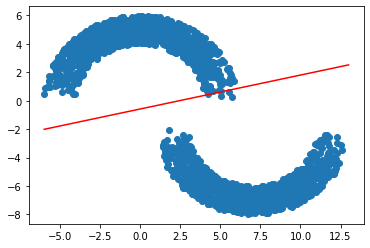

In [11]:
plt.plot(x_data, y_data, color="red")
plt.scatter(testdata_x, testdata_y)
plt.show()